# Visualizations

- The standard visualization package of python is `matplotlib`, which works fine, is very customizable, but doesn't always looks too great.
- `Seaborn` is another package that is built on top of `matplotlib` and looks a little better.
- `Vincent` is another package you might want to try out.

## matplotlib

- The standard visualization package of python is `matplotlib`. 
- We use the magic command `%matplotlib inline` so that images are embedded in the notebook.
- See the <a href="http://matplotlib.org/users/pyplot_tutorial.html" target="_blank">pyplot tutorial</a> for a quick Getting Started guide.

In [1]:
from matplotlib import pyplot as plt  
%matplotlib inline  

- The most common function of matplotlib is `plot`.
- Type `?plt.plot` to see the doc string.

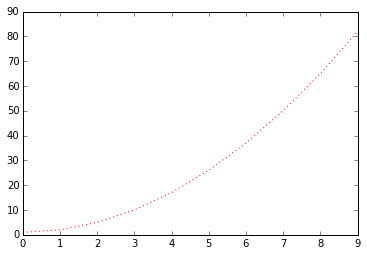

In [2]:
xx = range(10)
yy = [x ** 2 + 1 for x in xx]
plt.plot(xx, yy, 'r:')  # 'r' = red, and ':' = dotted line

Almost everything is customizable in `matplotlib`.

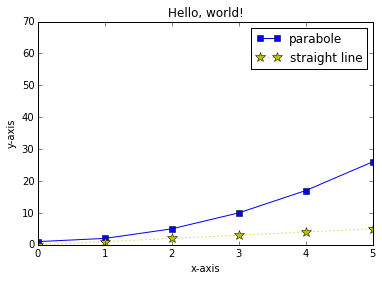

In [3]:
plt.title("Hello, world!")
plt.xlabel("x-axis"), plt.ylabel("y-axis")
plt.xlim(0, 5), plt.ylim(0, 70)
plt.plot(xx, yy, 'bs-', label="parabole")
plt.plot(range(6), range(6), 'y*:', markersize=10, label="straight line")
f = plt.legend()
# I often write `f = ` on the last line to surpress the output `<matplotlib.lines.Line2D at 0x10c750390>`

## Pandas plots

Pandas is built on top of `matplotlib` and has several functions built-in.

- If you haven't done so already, download the
<a href="http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip">Lahman Baseball dataset</a>.
- Note that you can find information about the meaning of the columns and the data in the `readme.txt` file.
- Load the `batting` dataset.

In [4]:
# Specify the correct path to the folder in `path_to_data`.
path_to_data = '/Users/ruben/Downloads/lahman-csv_2014-02-14/' 

In [5]:
import pandas as pd
batting = pd.read_csv(path_to_data + 'Batting.csv')

- Plot trend of average number of homeruns per year

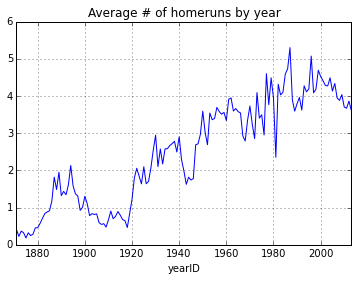

In [6]:
batting.groupby('yearID').HR.mean().plot()
plt.title("Average # of homeruns by year")

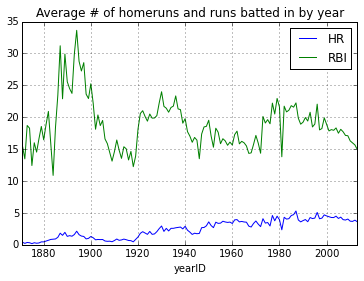

In [7]:
# We can also plot multiple features at ones in one plot
# Note the `f = ` on the last line, to surpress the output `<matplotlib.text.Text at 0x10da8fcd0>`
batting[['playerID', 'yearID', 'HR', 'RBI']].groupby('yearID').mean().plot()
f = plt.title("Average # of homeruns and runs batted in by year")

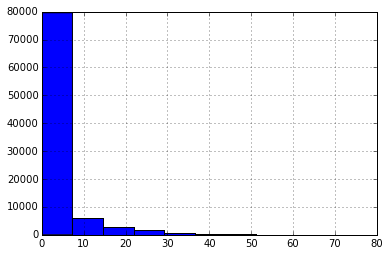

In [8]:
# What is the distributions of homeruns per player per year?
f = batting.HR.hist()

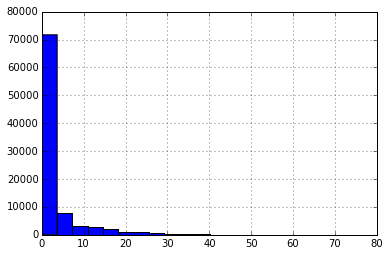

In [9]:
f = batting.HR.hist(bins=20)

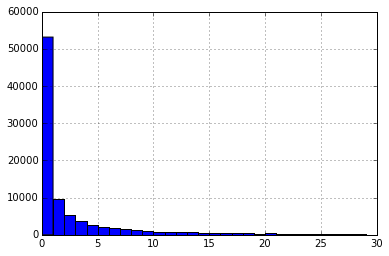

In [10]:
f = batting.HR.hist(bins=range(30))

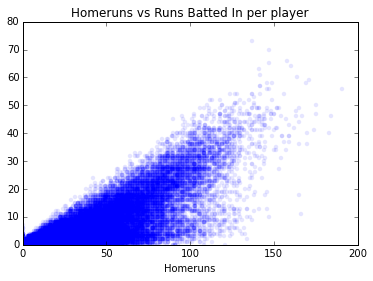

In [11]:
plt.title('Homeruns vs Runs Batted In per player')
plt.xlabel('Runs Batted In'), plt.xlabel('Homeruns')
plt.xlim(0, 200), plt.ylim(0, 80)
f = plt.scatter(batting.RBI, batting.HR, linewidth=0, alpha=.1)

## seaborn

- Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.
- Install seaborn by typing `pip install seaborn` on the command line.
- Simply importing `seaborn` already impacts your visualizations.

In [12]:
import seaborn as sb

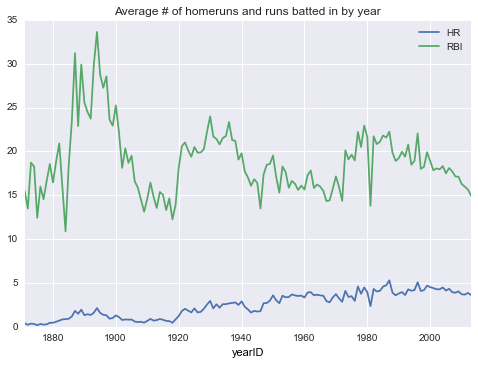

In [13]:
batting[['playerID', 'yearID', 'HR', 'RBI']].groupby('yearID').mean().plot()
f = plt.title("Average # of homeruns and runs batted in by year")

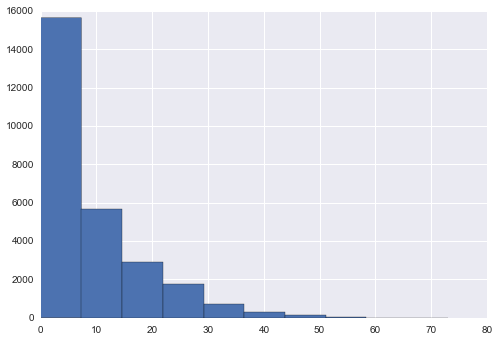

In [14]:
batting[batting['AB'] > 200]['HR'].hist()

Seaborn also has its own functions.

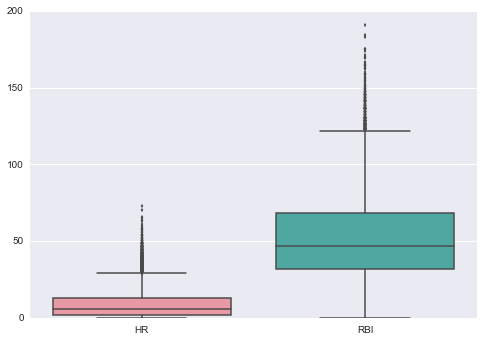

In [15]:
f = sb.boxplot(batting[batting['AB'] > 200][['HR', 'RBI']])

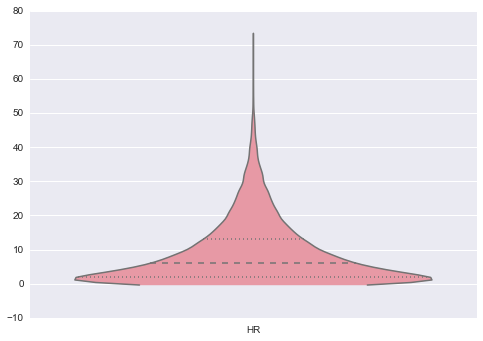

In [16]:
f = sb.violinplot(batting[batting['AB'] > 200][['HR']])

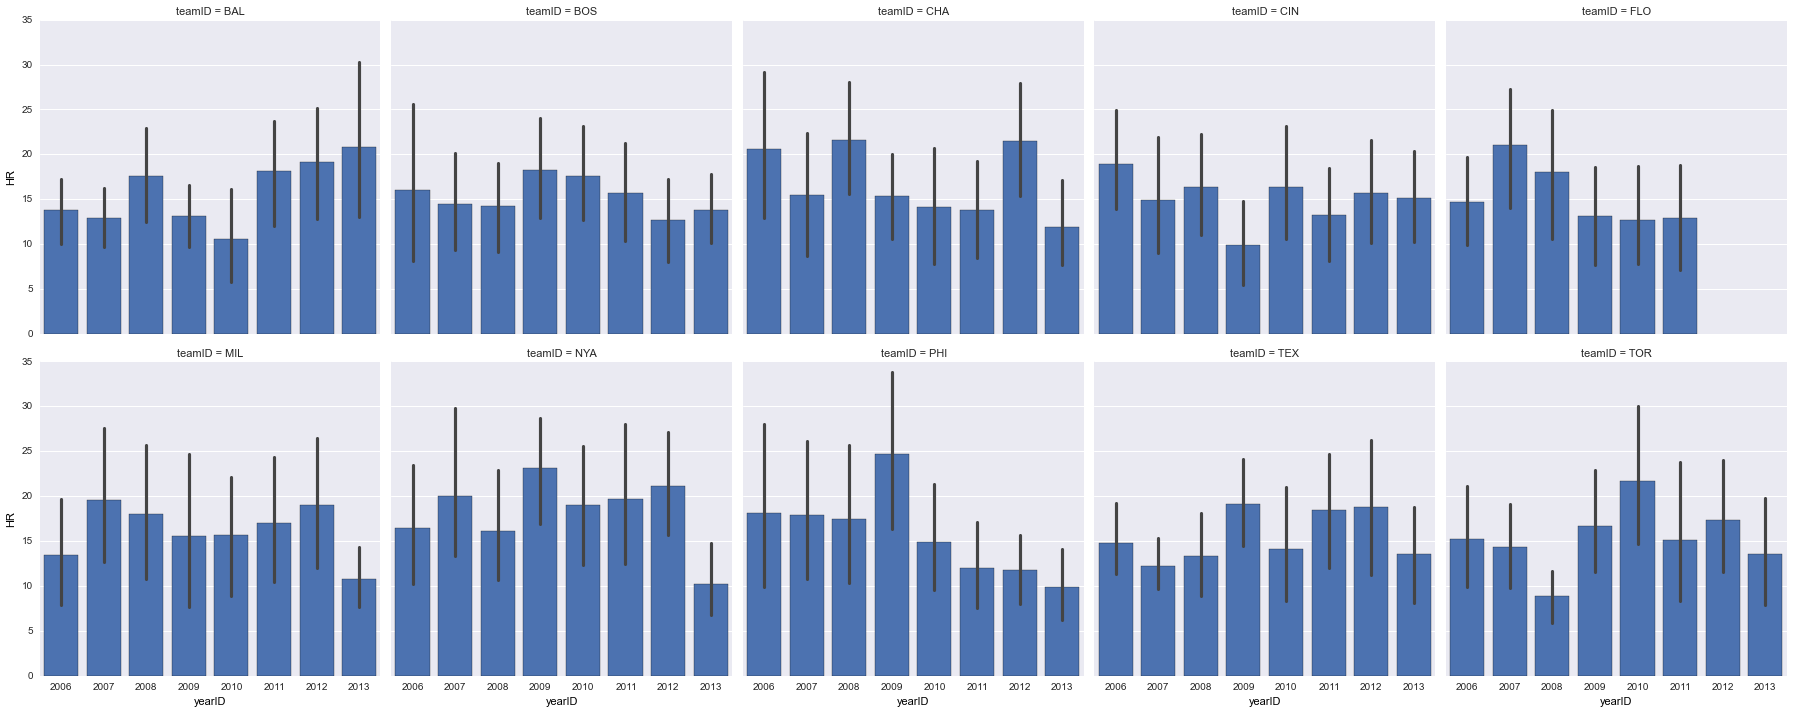

In [17]:
# filter only for # At Bats > 200
data = batting[batting['AB'] > 200]  
# look at last 10 years
data = data[data['yearID'] > 2005]
# look at teams with highest # or homeruns on average
top_teams = data[['teamID', 'HR']].groupby('teamID').mean().sort('HR', ascending=False)
data = data[data.teamID.isin(top_teams[:10].index)]
# print top_teams[:10]

# Homeruns per year, for the best teams individually
f = sb.factorplot(x='yearID', y='HR', col='teamID', col_wrap=5, data=data)

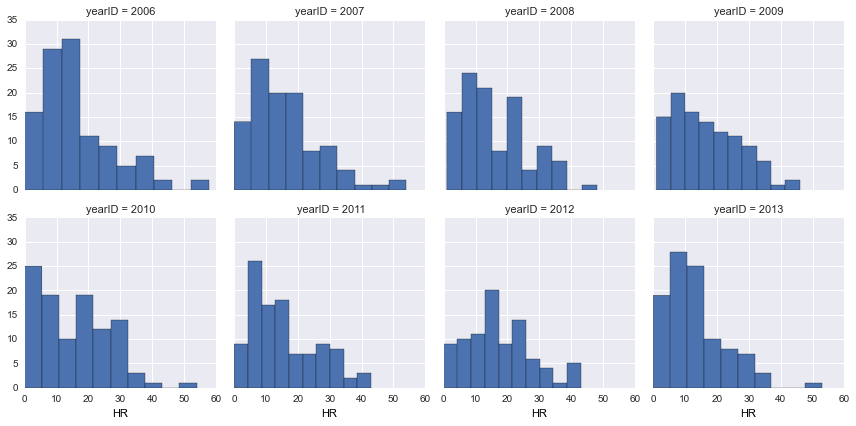

In [18]:
# What does the following code do?
g = sb.FacetGrid(data, col='yearID', col_wrap=4)
f = g.map(plt.hist, 'HR')

### Vincent

- Vincent combines the data capabilities of Python and Pandas with the visualization capabilities of JavaScript, D3 and Vega.
- Install Vincent by typing `pip install vincent` on the command line.
- Also see 
<a href="http://vincent.readthedocs.org/en/latest/quickstart.html" target="_blank">Quik start guide</a>

In [19]:
import vincent
reload(vincent)
vincent.initialize_notebook()

In [20]:
# Load salaries data file
salaries = pd.read_csv(path_to_data + 'salaries.csv')
team_salary = salaries[salaries['yearID'] == 2013].groupby('teamID')[['salary']].sum()

In [21]:
salary_plot = vincent.Bar(team_salary)
salary_plot.axis_titles(x='Team', y='Salary')

In [22]:
year_salary = salaries.groupby('yearID')[['salary']].sum()
year_salary.index = pd.to_datetime(year_salary.index, format="%Y")
vincent.Scatter(year_salary)

In [23]:
team_year_salary = pd.pivot_table(salaries, index='yearID', columns='teamID', values='salary', aggfunc='sum')
f = vincent.StackedBar(team_year_salary).legend(title='Teams')
f.width, f.height = 800, 500
f

<hr>

## Exercises

#### Basic plotting

Plot the function $f(x) = x^3 - 2x^2 + 4$ on the domain $[-5, 5]$.

In [30]:
def func(x):
    return None  # replace None by your answer

domain = range(-5, 6)
# plt.plot(...  # replace by your answer

Let's get some arbitrary dataset (see below)

In [28]:
import numpy as np  # import numpy -- we will cover this later
N = 1000  # number of dots
x = np.random.random(N)  # get N random values between 0 and 1
df = pd.DataFrame(dict(
        A=x,
        B=func(x),
        C=func(x) / func(x - 1)))
df.head()

- Plot A against B, A against C, and B against C

- Plot A against B, and make the size of the dots correspond with C

- Plot B against C, and make the _color_ of the dots correspond with A. (This should result in a grey scale.)


#### Pandas plots

Load the Lahman baseball datasets.

In [35]:
# Loading the Baseball datasets
master = pd.read_csv(path_to_data + 'Master.csv')
batting = pd.read_csv(path_to_data + 'Batting.csv')
salaries = pd.read_csv(path_to_data + 'Salaries.csv')

- How does the average salary of baseball players increase over time?

In case you haven't done them already, complete teh visualizations exercises from the *Intro to Pandas* notebook.

- Produce a histogram of player salaries.
- Plot salary against a few statistics of the batting statistics (HR, RBI, R) - are any of these well-correlated?

(Solutions are already given in the `into_to_pandas_solutions.ipynb` notebook of last class.)

In [31]:
# Loading the Baseball datasets
master = pd.read_csv(path_to_data + 'Master.csv')
batting = pd.read_csv(path_to_data + 'Batting.csv')
salaries = pd.read_csv(path_to_data + 'Salaries.csv')

In [32]:
# Solutions are already given in the `into_to_pandas_solutions.ipynb` notebook of last class.

## Further reading

- <b>Pandas</b>:
<a href="http://pandas.pydata.org/pandas-docs/stable/10min.html" target="_blank">10 Minutes to Pandas</a> and
<a href="http://pandas.pydata.org/pandas-docs/stable/tutorials.html" target="_blank">tutorials</a>
of the official documentation<br>
Also recommended is the book <i>Python for Data Analysis</i>, O'Reilly Media.
- <b>Matplotlib pyplot</b>:
<a href="http://matplotlib.org/users/pyplot_tutorial.html" target="_blank">tutorial</a> 
of the official documentation
- <b>Seaborn</b>:
<a href="http://stanford.edu/~mwaskom/software/seaborn/" target="_blank">website</a>